<a href="https://colab.research.google.com/github/Ruqyai/tfjs/blob/main/Predict%20a%20Home%20Price/tfjs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict a Home Price


<h3>About Data </h3>

The dataset consisted of historic data of houses sold between May 2014 to May 2015.

The dataset consisted of 21 variables and 21613 observations.

[more info](https://www.kaggle.com/shivachandel/kc-house-data)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/Ruqyai/tfjs/main/kc_house_data.csv'

In [3]:
# Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Take a Quick Look at the Data Structure
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Get info abot your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Check if there is any missing value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

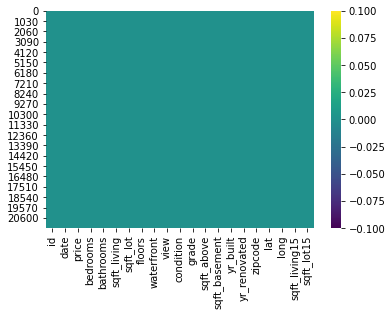

In [7]:
# Check if there is any missing value
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [8]:
# Choose the features and define the labels
columns = ['bedrooms', 'bathrooms','sqft_living', 'grade']
labels = df['price'].values
features = df[list(columns)].values


In [9]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [10]:
# Build The structure of Model
def build_model():
    model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape= X_train[0].shape ),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

    
#  Create instance
model = build_model()

In [11]:
# Train the model
EPOCHS = 100
model.fit(X_train, y_train, epochs=EPOCHS, verbose=1)

Epoch 1/100
473/473 [==============================] - 0s 987us/step - loss: 326917062656.0000 - mae: 454204.9375 - mse: 326917062656.0000
Epoch 2/100
473/473 [==============================] - 0s 995us/step - loss: 80159260672.0000 - mae: 182749.8750 - mse: 80159260672.0000
Epoch 3/100
473/473 [==============================] - 0s 952us/step - loss: 67279679488.0000 - mae: 171974.0781 - mse: 67279679488.0000
Epoch 4/100
473/473 [==============================] - 0s 1ms/step - loss: 67138097152.0000 - mae: 172255.1719 - mse: 67138097152.0000
Epoch 5/100
473/473 [==============================] - 0s 992us/step - loss: 67233673216.0000 - mae: 172042.1562 - mse: 67233673216.0000
Epoch 6/100
473/473 [==============================] - 0s 1ms/step - loss: 67223891968.0000 - mae: 171770.4844 - mse: 67223891968.0000
Epoch 7/100
473/473 [==============================] - 0s 937us/step - loss: 67125559296.0000 - mae: 171858.5469 - mse: 67125559296.0000
Epoch 8/100
473/473 [======================

In [12]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) 
print ("Predicted price  : ", predict[idx])
print ("Real price : ", y_test[idx])

Predicted price  :  [483607.22]
Real price :  480000.0


In [13]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test,  y_test)
print("The mean absolute error: {:5.2f}".format(mae))
print("The mean squared error: {:5.2f}".format(mse))
print("The Loss: {:5.2f}".format(loss))

203/203 [==============================] - 0s 865us/step - loss: 71909720064.0000 - mae: 171674.0625 - mse: 71909720064.0000
The mean absolute error: 171674.06
The mean squared error: 71909720064.00
The Loss: 71909720064.00


In [14]:
# Show a random predicted home price and look what its actual price
idx= np.random.choice(X_test.shape[0])
print ("Predicted price :", predict[idx])
print ("Actual price :", y_test[idx])

Predicted price : [584601.8]
Actual price : 606000.0


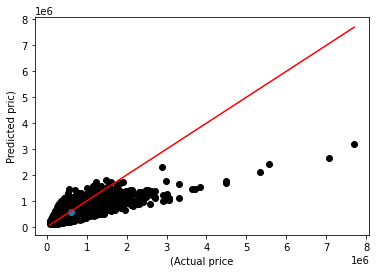

In [15]:
# visualization
plt.scatter(y_test, predict,  color='black')
plt.scatter(y_test[idx], predict[idx])
plt.xlabel('(Actual price')
plt.ylabel('Predicted pric)')
plt.plot([df['price'].min(), df['price'].max()], [df['price'].min(), df['price'].max()], color='red')
plt.show()

In [16]:
# Save the model
model.save("saved.h5")

In [17]:
# Install requirements
!pip install tensorflowjs

     |████████████████████████████████| 71kB 2.5MB/s 
     |████████████████████████████████| 112kB 9.9MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [18]:
# Create a folder 
!mkdir model
# Covert the python model 
# 1-argument format(keras) 
# 2-argument path to my_model.h5  
# 3-argument path to tfjs_target_dir
!tensorflowjs_converter --input_format keras saved.h5 model/

2020-11-06 19:32:22.848753: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [19]:
# zip the created folder 
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 75%)
  adding: model/group1-shard1of1.bin (deflated 8%)


In [20]:
# Downlod the zip folder
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>